<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Colored_Images_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape
y_train.shape

(50000,)

In [ ]:
# number of classes
K = len(set(y_train))
K

10

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [ ]:
# Building a model for augmentation
# MaxPooling2D is used the same with strides = 2 in Conv2D as well
i = Input(shape =  x_train[0].shape)
x = data_augmentation(i)
x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = "relu", padding = "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)

In [ ]:
# This is old model without the augmentation and batch normalization

# i = Input(shape = x_train[0].shape)
# x = Conv2D(32, (3, 3), strides = 2,activation = "relu")(i)
# x = Conv2D(64, (3, 3), strides = 2, activation = "relu")(x)
# x = Conv2D(128, (3, 3), strides = 2, activation = "relu")(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation = "relu")(x)
# x = Dropout(0.2)(x)
# x = Dense(K, activation = "softmax")(x)

# model = Model(i, x)

In [ ]:
# Compile
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 575s 362ms/step - accuracy: 0.3968 - loss: 1.8474 - val_accuracy: 0.5078 - val_loss: 1.4356
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 666s 391ms/step - accuracy: 0.5679 - loss: 1.2201 - val_accuracy: 0.5984 - val_loss: 1.2789
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 556s 356ms/step - accuracy: 0.6392 - loss: 1.0316 - val_accuracy: 0.6247 - val_loss: 1.1202
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 540s 342ms/step - accuracy: 0.6783 - loss: 0.9383 - val_accuracy: 0.6996 - val_loss: 0.8937
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 561s 341ms/step - accuracy: 0.7017 - loss: 0.8592 - val_accuracy: 0.7075 - val_loss: 0.8995
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 564s 342ms/step - accuracy: 0.7203 - loss: 0.8074 - val_accuracy: 0.7483 - val_loss: 0.7516
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - accuracy: 0.7394 - loss: 0.7620 - val_accuracy: 0.7504 - val_loss: 0.7692
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 352ms/step - ac

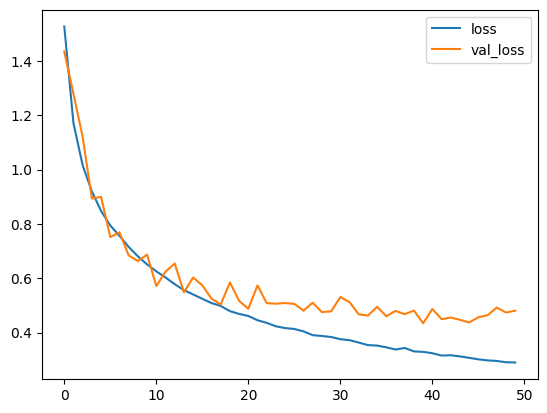

In [ ]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

# There's some chance the model is overfitting

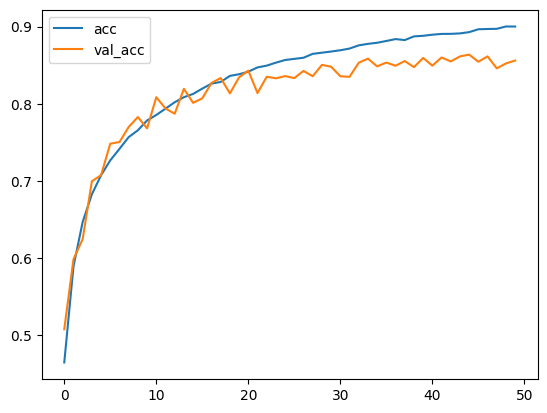

In [ ]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend();

# The val_accuracy is steady, another sign of overfitting.
# If training accuracy getting higher without improvement in the validation accuracy then the model is only learning to match the noise in the training set

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.84      0.97      0.90      1000
           2       0.81      0.81      0.81      1000
           3       0.76      0.75      0.75      1000
           4       0.86      0.82      0.84      1000
           5       0.84      0.79      0.81      1000
           6       0.85      0.91      0.88      1000
           7       0.91      0.89      0.90      1000
           8       0.95      0.89      0.92      1000
           9       0.90      0.85      0.87      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Confusion matrix:
[[896  21  19  10   5   0   5   6  20  18]
 [  4 968   0   2   0   1   2   1   2  20]
 [ 38   5 814  36  32  20  34  15   3   3]
 [ 16   3  42 746  27  84  43  12   9  18]
 [  7   1  43  32 818  17  43  32   3   4]
 [  6   6  35  94  28 786  21  18   0   6]
 [  5   5  26  31  12   3 909   1   2   6]
 [ 13   2  17  24  25  23   3 886   0   7]
 [ 52  24   5   8   1   3   5   2 891   9]
 [ 14 116   4   5   0   1   2   1  11 846]]


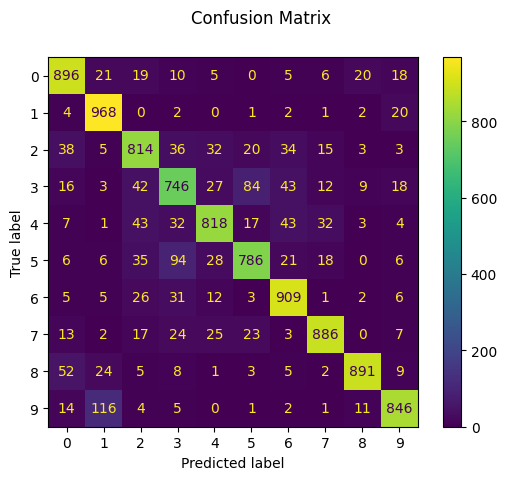

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

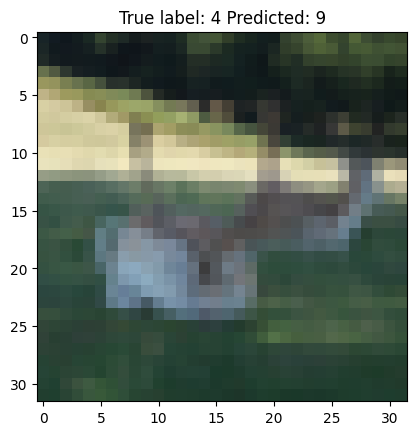

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True label: {y_test[i]} Predicted: {y_pred[i]}");

In [2]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
# Using TensorFlow Datasets as alternative
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size = 10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
r = model.fit(train_dataset, validation_data = test_dataset, epochs = 50)